# 1. Install and Import Dependencies

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
!pip install torch torchvision numpy --upgrade

In [ ]:
!pip uninstall yolov5 -y
!pip install yolov5

# Load Model

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [34]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\mss33/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-3-17 Python-3.9.13 torch-2.0.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [35]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# MAKE Detections

In [36]:
# Image
img = 'https://school.busanedu.net/upload/bbs/files/2023/hgschl/bssm-h/ntt/5095185/03/c54f8d9136581562d7a14e518617f82e.jpg'

# Inference
results = model(img)

In [37]:
results.print()

image 1/1: 4248x5664 15 persons
Speed: 2034.3ms pre-process, 276.4ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)


<function matplotlib.pyplot.show(close=None, block=None)>

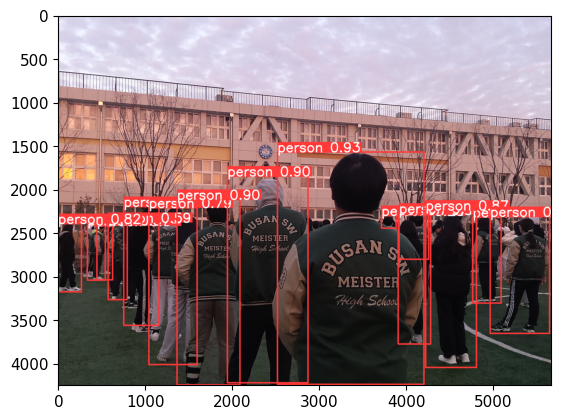

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

In [39]:
results.xyxy

[tensor([[2.52166e+03, 1.57366e+03, 4.20491e+03, 4.24078e+03, 9.27063e-01, 0.00000e+00],
         [1.94657e+03, 1.85053e+03, 2.87239e+03, 4.22212e+03, 9.03308e-01, 0.00000e+00],
         [1.36796e+03, 2.11869e+03, 2.09011e+03, 4.24677e+03, 8.95632e-01, 0.00000e+00],
         [4.96552e+03, 2.31462e+03, 5.64781e+03, 3.65597e+03, 8.80071e-01, 0.00000e+00],
         [4.22401e+03, 2.24164e+03, 4.80768e+03, 4.04633e+03, 8.67810e-01, 0.00000e+00],
         [8.87164e-01, 2.39579e+03, 2.69436e+02, 3.17857e+03, 8.22819e-01, 0.00000e+00],
         [1.04453e+03, 2.21344e+03, 1.59858e+03, 4.01320e+03, 7.87001e-01, 0.00000e+00],
         [4.76404e+03, 2.32090e+03, 5.09164e+03, 3.30775e+03, 7.28145e-01, 0.00000e+00],
         [7.55645e+02, 2.19935e+03, 1.15912e+03, 3.56375e+03, 6.82697e-01, 0.00000e+00],
         [5.76883e+02, 2.38273e+03, 7.95802e+02, 3.26844e+03, 5.88389e-01, 0.00000e+00],
         [3.37033e+02, 2.41311e+03, 5.43781e+02, 3.04466e+03, 5.67539e-01, 0.00000e+00],
         [3.91862e+03

In [40]:
results.render()

[array([[[207, 202, 224],
         [207, 202, 224],
         [209, 201, 225],
         ...,
         [207, 203, 226],
         [206, 202, 227],
         [206, 202, 227]],
 
        [[208, 203, 225],
         [208, 203, 225],
         [209, 201, 225],
         ...,
         [207, 203, 226],
         [207, 203, 228],
         [206, 202, 227]],
 
        [[211, 203, 226],
         [210, 202, 225],
         [210, 202, 225],
         ...,
         [208, 204, 227],
         [208, 202, 228],
         [208, 202, 228]],
 
        ...,
 
        [[ 48,  60,  50],
         [ 50,  62,  52],
         [ 52,  64,  54],
         ...,
         [ 34,  47,  38],
         [ 33,  46,  37],
         [ 33,  46,  37]],
 
        [[ 53,  65,  53],
         [ 55,  67,  55],
         [ 58,  70,  58],
         ...,
         [ 32,  45,  36],
         [ 32,  45,  36],
         [ 32,  45,  36]],
 
        [[ 56,  68,  56],
         [ 57,  69,  57],
         [ 60,  72,  60],
         ...,
         [ 31,  44,  35],
  

In [15]:
import cv2
cap = cv2.VideoCapture('test.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [16]:
import uuid
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [27]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [25]:
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\awake.e7be41e0-c856-11ed-bbc9-106fd9601ea0.jpg
data\images\awake.e7be41e1-c856-11ed-a9ba-106fd9601ea0.jpg
data\images\awake.e7be41e2-c856-11ed-9343-106fd9601ea0.jpg
data\images\awake.e7be41e3-c856-11ed-a75d-106fd9601ea0.jpg
data\images\awake.e7be41e4-c856-11ed-b45e-106fd9601ea0.jpg
data\images\awake.e7be41e5-c856-11ed-a45b-106fd9601ea0.jpg
data\images\awake.e7be41e6-c856-11ed-9ad5-106fd9601ea0.jpg
data\images\awake.e7be41e7-c856-11ed-9ed0-106fd9601ea0.jpg
data\images\awake.e7be41e8-c856-11ed-b1fe-106fd9601ea0.jpg
data\images\awake.e7be41e9-c856-11ed-acf8-106fd9601ea0.jpg
data\images\awake.e7be41ea-c856-11ed-b76c-106fd9601ea0.jpg
data\images\awake.e7be41eb-c856-11ed-9299-106fd9601ea0.jpg
data\images\awake.e7be41ec-c856-11ed-820e-106fd9601ea0.jpg
data\images\awake.e7be72b3-c856-11ed-9138-106fd9601ea0.jpg
data\images\awake.e7be72b4-c856-11ed-b54e-106fd9601ea0.jpg
data\images\awake.e7be72b5-c856-11ed-9702-106fd9601ea0.jpg
data\images\awake.e7be72b6-c856-11ed-b917-106fd9601ea0.j

In [28]:
!pip install pyqt5 lxml --upgrade

  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached lxml-4.9.2-cp39-cp39-win_amd64.whl (3.9 MB)
  Using cached PyQt5_sip-12.11.1-cp39-cp39-win_amd64.whl (78 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)


In [29]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [41]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [32]:
!cd labelImg && python labelImg.py

In [45]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C
